In [45]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

In [63]:
raw_steel = te.fetchMarkets(symbol=['JBP:COM'], initDate='2016-01-01', endDate='2020-12-31' , output_type='df')
raw_steel.head()

,symbol,open,high,low,close
2020-12-31,JBP:COM,4190.0,4270.0,4180.0,4220.0
2020-12-30,JBP:COM,4160.0,4195.0,4111.0,4169.0
2020-12-29,JBP:COM,4180.0,4221.0,4155.0,4180.0
2020-12-28,JBP:COM,4243.0,4279.0,4182.0,4223.0
2020-12-25,JBP:COM,4240.0,4262.0,4156.0,4209.0


In [64]:
raw_exports = te.getCmtHistorical(symbol = 'PRTWLDXX722', output_type='df')
raw_exports.tail()

,symbol,date,value
26,PRTWLDXX721,2016-12-31T00:00:00,1.964817e+09
27,PRTWLDXX721,2017-12-31T00:00:00,2.681680e+09
28,PRTWLDXX721,2018-12-31T00:00:00,3.296089e+09
29,PRTWLDXX721,2019-12-31T00:00:00,2.738350e+09
30,PRTWLDXX721,2020-12-31T00:00:00,2.395562e+09


In [65]:
raw_imports = te.getCmtHistorical(symbol = 'PRTWLDXX721', output_type='df')
raw_imports.tail()

,symbol,date,value
26,PRTWLDXX721,2016-12-31T00:00:00,1.964817e+09
27,PRTWLDXX721,2017-12-31T00:00:00,2.681680e+09
28,PRTWLDXX721,2018-12-31T00:00:00,3.296089e+09
29,PRTWLDXX721,2019-12-31T00:00:00,2.738350e+09
30,PRTWLDXX721,2020-12-31T00:00:00,2.395562e+09


In [66]:
steel = raw_steel[['Date', 'Close']].rename(columns={'Close': 'Steel'})
 
steel.tail()

,Steel
Date,
2016-01-08,1829.0
2016-01-07,1848.0
2016-01-06,1855.0
2016-01-05,1833.0
2016-01-04,1856.0


In [67]:
imports = raw_imports[['value', 'date']].rename(columns={'value': 'imports'})
imports['Date'] = pd.DatetimeIndex(imports['date'])
imports.set_index('Date', inplace=True)
del imports['date']
exports = raw_exports[['value', 'date']].rename(columns={'value': 'exports'})
exports['Date'] = pd.DatetimeIndex(exports['date'])
exports.set_index('Date', inplace=True)
del exports['date']
df = pd.merge(imports, exports, on ='Date')
df = df[df.index > '2016-01-31']

steel['Date'] = pd.to_datetime(steel['Date'])  # Convert 'Date' column to datetime format
steel.set_index('Date', inplace=True)  # Set 'Date' column as the index

steel_yearly_avg = steel['Steel'].resample('Y').mean()
steel_yearly_avg=steel_yearly_avg.to_frame()


,Portugal Imports (USD),Portugal Exports (USD),Steel AVG Price (CNY/T)
0,1.964817e+09,1.178638e+09,2339.622951
1,2.681680e+09,1.532346e+09,3776.807377
2,3.296089e+09,1.856112e+09,4127.468254
3,2.738350e+09,1.503772e+09,3825.249042
4,2.395562e+09,1.324996e+09,3687.931298


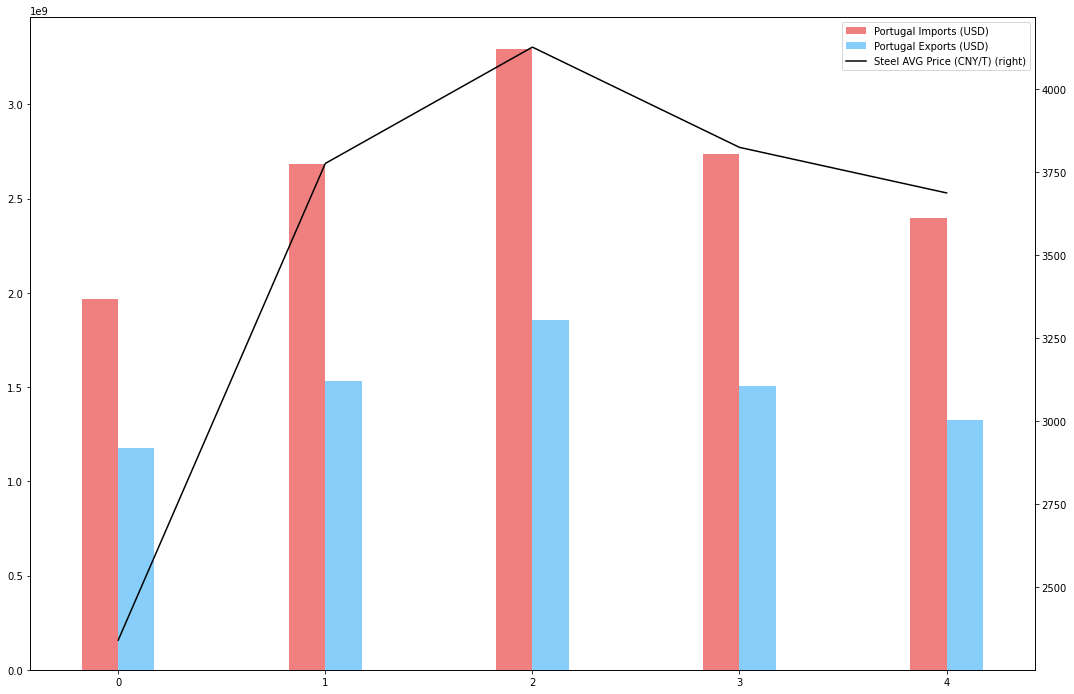

In [72]:
color_dict = {'imports': 'lightcoral', 'exports': 'lightskyblue'}
label = df.index.year
Imports = df['imports'].values.tolist()
Exports = df['exports'].values.tolist()
steel = steel_yearly_avg['Steel'].values.tolist()
width = .35

max_length = max(len(Imports), len(Exports), len(steel))

Imports += [0] * (max_length - len(Imports))
Exports += [0] * (max_length - len(Exports))
steel += [0] * (max_length - len(steel))

data = pd.DataFrame({
    'Portugal Imports (USD)': Imports,
    'Portugal Exports (USD)': Exports,
    'Steel AVG Price (CNY/T)': steel
})

data[['Portugal Imports (USD)','Portugal Exports (USD)']].plot(kind='bar', width = width,figsize=(18, 12), color=[color_dict.get(x, '#333333') for x in df.columns])
data['Steel AVG Price (CNY/T)'].plot(secondary_y=True, color='black',legend='s')
data.tail()